## Machine Learning Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv(
    filepath_or_buffer='../data/processed/hotel_reservations_encoded_cleaned.csv',
    sep=',',
    header=0
)
data.head()

,no_of_adults,lead_time,arrival_year,arrival_month,arrival_date,avg_price_per_room,booking_status,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,...,no_of_weekend_nights_1,no_of_weekend_nights_2,no_of_week_nights_0,no_of_week_nights_1,no_of_week_nights_2,no_of_week_nights_3,no_of_week_nights_4,no_of_week_nights_5,no_of_special_requests_0,no_of_special_requests_1
0,2,224,2017,10,2,65.00,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,2,5,2018,11,6,106.68,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,1,1,2018,2,28,60.00,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
3,2,211,2018,5,20,100.00,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2,48,2018,4,11,94.50,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0


### Creating Train and Test dataset

In [3]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X = data.drop(columns=['booking_status'])
y = data['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the training and test sets after concatenating the features and target variable
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train.to_csv('../data/ml/hotel_reservations_train.csv', index=False)
test.to_csv('../data/ml/hotel_reservations_test.csv', index=False)

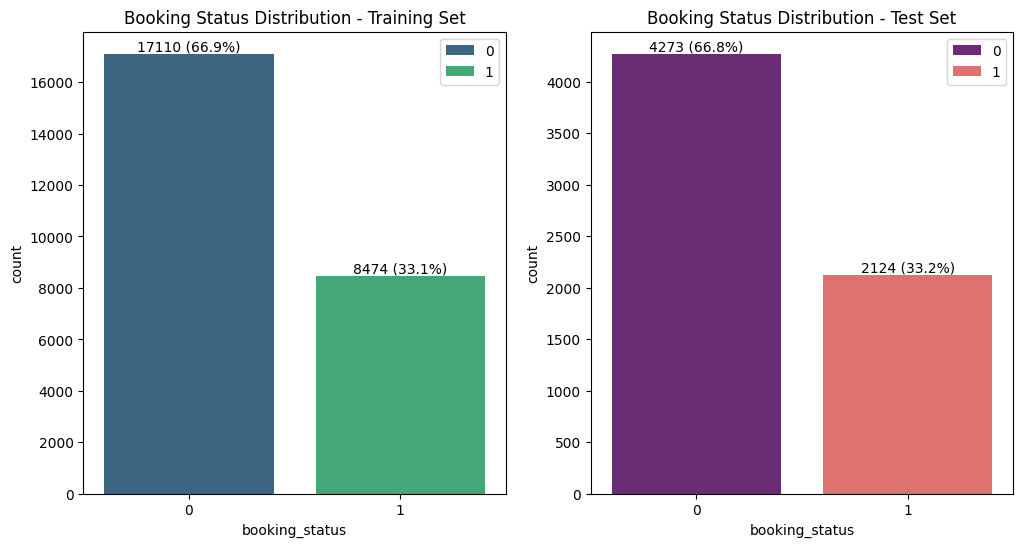

In [4]:
# Check the distribution of the target variable in the training and test sets using bar plot to ensure that they are similar and plot it one beside the other
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='booking_status', data=train, ax=ax[0], palette='viridis', hue='booking_status')
sns.countplot(x='booking_status', data=test, ax=ax[1], palette='magma', hue='booking_status')

# Add percentage and count labels on each bar
total_train = len(train)
total_test = len(test)
for p in ax[0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_train)
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    if y > 0:  # Only add labels if the bar is not zero
        ax[0].annotate(f'{int(count)} ({percentage})', (x, y), ha='center', va='bottom')

for p in ax[1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_test)
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    if y > 0:  # Only add labels if the bar is not zero
        ax[1].annotate(f'{int(count)} ({percentage})', (x, y), ha='center', va='bottom')

ax[0].set_title('Booking Status Distribution - Training Set')
ax[1].set_title('Booking Status Distribution - Test Set')
ax[0].legend()
ax[1].legend()

plt.savefig('../reports/images/booking_status_distribution_train_test.png')
plt.show()

## K Nearest Neighbours

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
clf = KNeighborsClassifier(
    n_neighbors=5,          # Number of neighbors to use
    weights='uniform',      # Weight function used in prediction
    algorithm='auto',       # Algorithm used to compute the nearest neighbors
    leaf_size=30,           # Leaf size passed to BallTree or KDTree algorithm
    p=2,                    # Euclidean distance
    metric='minkowski',     # Distance metric to use
    metric_params=None,     # Additional keyword arguments for the metric function
    n_jobs=None             # Number of parallel jobs to run for neighbors search
)

In [7]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
predictions_knn = clf.predict(X_test)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import balanced_accuracy_score

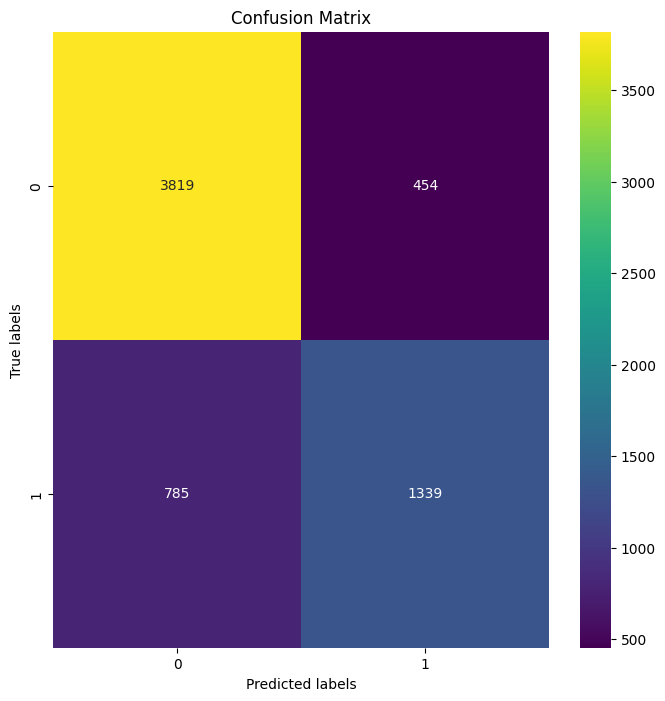

In [10]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions_knn)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.savefig('../reports/images/confusion_matrix_knn.png')
plt.show()

In [11]:
# Compute the classification report
cr = classification_report(y_test, predictions_knn)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4273
           1       0.75      0.63      0.68      2124

    accuracy                           0.81      6397
   macro avg       0.79      0.76      0.77      6397
weighted avg       0.80      0.81      0.80      6397



In [12]:
# Compute the accuracy score
accuracy = accuracy_score(y_test, predictions_knn)
print(f'Accuracy: {accuracy:.2f}')

# Compute the precision score
precision = precision_score(y_test, predictions_knn, average='weighted')
print(f'Precision: {precision:.2f}')

# Compute the recall score
recall = recall_score(y_test, predictions_knn, average='weighted')
print(f'Recall: {recall:.2f}')

# Compute the F1 score
f1 = f1_score(y_test, predictions_knn, average='weighted')
print(f'F1 Score: {f1:.2f}')

# Compute the balanced accuracy score
balanced_accuracy = balanced_accuracy_score(y_test, predictions_knn)
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, predictions_knn, average='weighted', multi_class='ovr')
print(f'ROC AUC: {roc_auc:.2f}')

# Compute the ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, predictions_knn)
    roc_auc[i] = roc_auc_score(y_test, predictions_knn)

Accuracy: 0.81
Precision: 0.80
Recall: 0.81
F1 Score: 0.80
Balanced Accuracy: 0.76
ROC AUC: 0.76


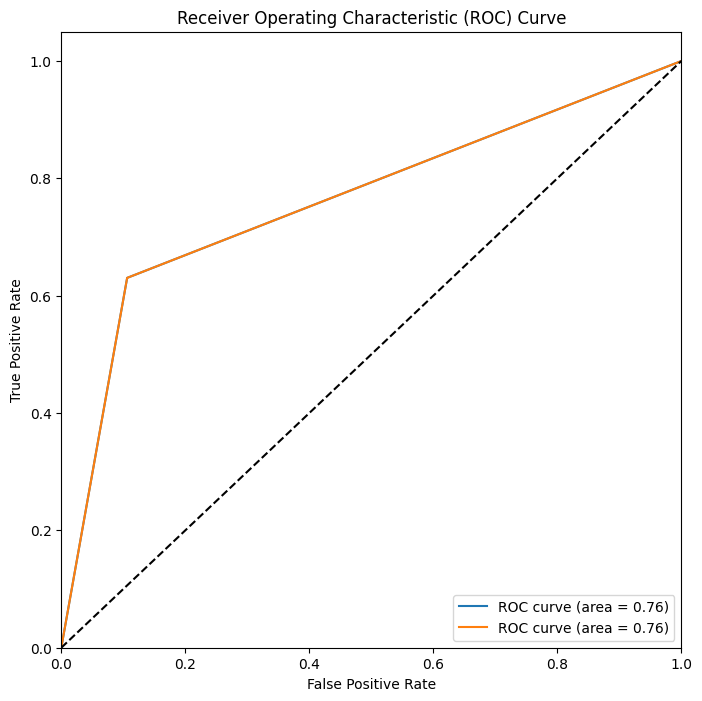

In [13]:
# Plot the ROC curve
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(n_classes):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc='lower right')
plt.savefig('../reports/images/roc_curve_knn.png')
plt.show()

Standard Scaling
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4273
           1       0.77      0.71      0.74      2124

    accuracy                           0.83      6397
   macro avg       0.82      0.80      0.81      6397
weighted avg       0.83      0.83      0.83      6397

Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1 Score: 0.83
Balanced Accuracy: 0.80
ROC AUC: 0.80


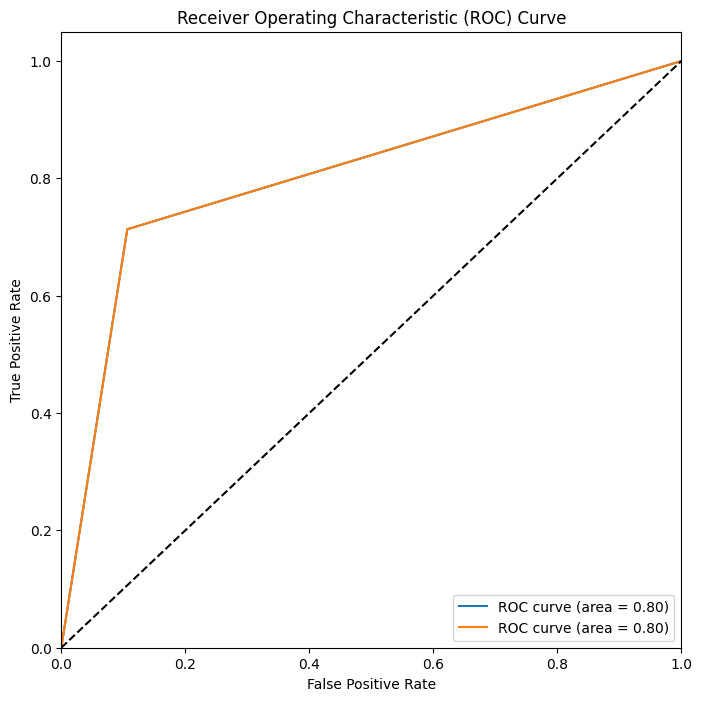

Min_max Scaling
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4273
           1       0.77      0.72      0.74      2124

    accuracy                           0.83      6397
   macro avg       0.82      0.81      0.81      6397
weighted avg       0.83      0.83      0.83      6397

Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1 Score: 0.83
Balanced Accuracy: 0.81
ROC AUC: 0.81


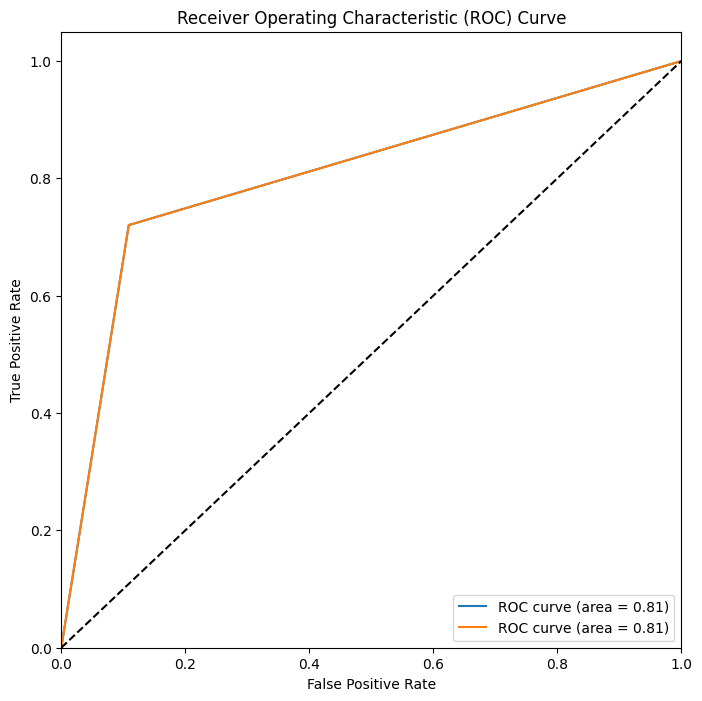

Max_abs Scaling
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4273
           1       0.77      0.72      0.74      2124

    accuracy                           0.84      6397
   macro avg       0.82      0.81      0.81      6397
weighted avg       0.83      0.84      0.83      6397

Accuracy: 0.84
Precision: 0.83
Recall: 0.84
F1 Score: 0.83
Balanced Accuracy: 0.81
ROC AUC: 0.81


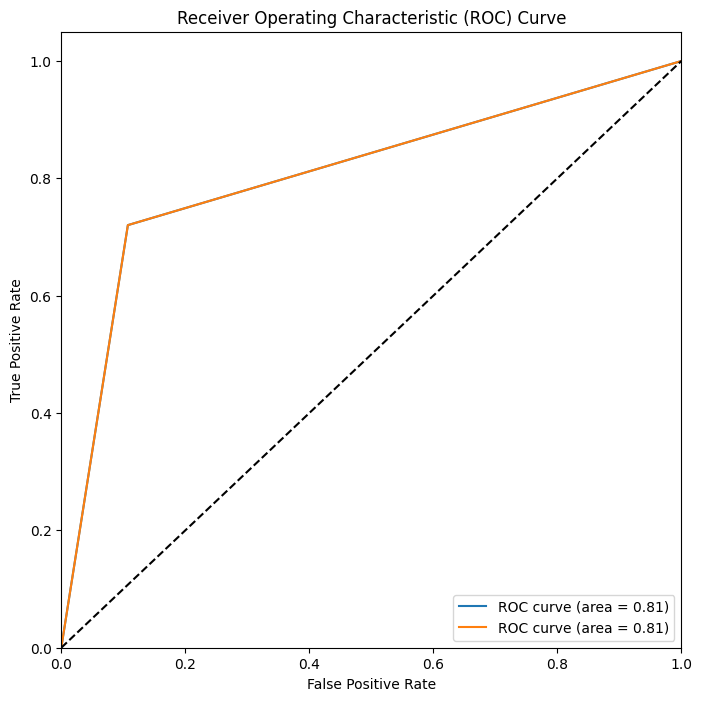

Robust Scaling
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4273
           1       0.78      0.73      0.75      2124

    accuracy                           0.84      6397
   macro avg       0.82      0.81      0.82      6397
weighted avg       0.84      0.84      0.84      6397

Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.84
Balanced Accuracy: 0.81
ROC AUC: 0.81


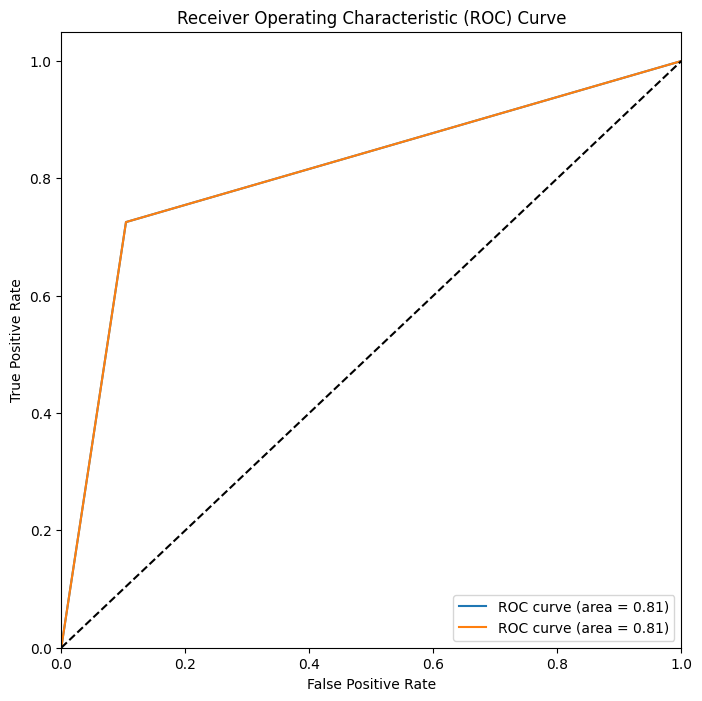

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

scalers = {
    'standard': StandardScaler(),
    'min_max': MinMaxScaler(),
    'max_abs': MaxAbsScaler(),
    'robust': RobustScaler()
}

for scaler in scalers:
    # Scale the training and test sets
    X_train_scaled = scalers[scaler].fit_transform(X_train)
    X_test_scaled = scalers[scaler].transform(X_test)

    # Fit the KNN classifier
    clf.fit(X_train_scaled, y_train)

    # Make predictions
    predictions_knn = clf.predict(X_test_scaled)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, predictions_knn)

    # Compute the classification report
    cr = classification_report(y_test, predictions_knn)
    print(f'{scaler.capitalize()} Scaling\n{cr}')

    # Compute the accuracy score
    accuracy = accuracy_score(y_test, predictions_knn)
    print(f'Accuracy: {accuracy:.2f}')

    # Compute the precision score
    precision = precision_score(y_test, predictions_knn, average='weighted')
    print(f'Precision: {precision:.2f}')

    # Compute the recall score
    recall = recall_score(y_test, predictions_knn, average='weighted')
    print(f'Recall: {recall:.2f}')

    # Compute the F1 score
    f1 = f1_score(y_test, predictions_knn, average='weighted')
    print(f'F1 Score: {f1:.2f}')

    # Compute the balanced accuracy score
    balanced_accuracy = balanced_accuracy_score(y_test, predictions_knn)
    print(f'Balanced Accuracy: {balanced_accuracy:.2f}')

    # Compute the ROC AUC score
    roc_auc = roc_auc_score(y_test, predictions_knn, average='weighted', multi_class='ovr')
    print(f'ROC AUC: {roc_auc:.2f}')

    # Compute the ROC curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = 2
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, predictions_knn)
        roc_auc[i] = roc_auc_score(y_test, predictions_knn)

    # Plot the ROC curve
    fig, ax = plt.subplots(figsize=(8, 8))
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax.legend(loc='lower right')
    plt.savefig(f'../reports/images/roc_curve_knn_{scaler}.png')
    plt.show()